# Visualize the results of the linear model

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

In [2]:
input_dir <- "results/Plate2"
lm_file <- file.path(input_dir, "linear_model_all_cp_features.tsv")
lm_dp_file <- file.path(input_dir, "linear_model_dp_features.tsv")

output_fig_dir <- "figures"
lm_fig <- file.path(output_fig_dir, "linear_model_all_cp_features_plate2.png")
lm_dp_fig <- file.path(output_fig_dir, "linear_model_dp_features.png")

## Visualize CP features

In [3]:
# Load and process linear model data
lm_df <- readr::read_tsv(
    lm_file, col_types = readr::cols(.default = "d", feature = "c")
)

# Arrange by absolute value coefficient
# Split out components of feature name for visualization
lm_df <- lm_df %>%
    dplyr::arrange(desc(abs(Null_coef))) %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

# Clean channel for visualization
lm_df$channel_cleaned <-
    dplyr::recode(
        lm_df$channel_cleaned,
        "DAPI" = "nuclei",
        "RFP" = "actin",
        "GFP" = "ER",
        .default = "other",
        .missing="other"
    )

print(dim(lm_df))
head(lm_df, 10)

Warning message:
“Expected 6 pieces. Additional pieces discarded in 468 rows [18, 20, 21, 22, 25,
26, 31, 32, 39, 40, 41, 42, 44, 45, 47, 48, 49, 50, 57, 59, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 730 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 23, 24, ...].”


[1] 1198   12


feature,compartment,feature_group,measurement,channel,parameter1,parameter2,r2_score,cell_count_coef,Null_coef,WT_coef,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Nuclei_Correlation_Costes_DAPI_GFP,Nuclei,Correlation,Costes,DAPI,GFP,NA,0.14932764,-0.012757186,0.4892796,-0.4892796,nuclei
Cells_Neighbors_NumberOfNeighbors_50,Cells,Neighbors,NumberOfNeighbors,50,NA,NA,0.10742651,0.014035087,-0.4285297,0.4285297,other
Cells_Neighbors_NumberOfNeighbors_Adjacent,Cells,Neighbors,NumberOfNeighbors,Adjacent,NA,NA,0.11147547,0.011169964,-0.4234875,0.4234875,other
Cells_Correlation_Costes_DAPI_GFP,Cells,Correlation,Costes,DAPI,GFP,NA,0.11536382,-0.005863720,0.3962738,-0.3962738,nuclei
Cells_Granularity_1_RFP,Cells,Granularity,1,RFP,NA,NA,0.11164739,0.006299855,-0.3937541,0.3937541,actin
Cytoplasm_Granularity_1_RFP,Cytoplasm,Granularity,1,RFP,NA,NA,0.10871041,0.006391090,-0.3898011,0.3898011,actin
Nuclei_Correlation_K_GFP_RFP,Nuclei,Correlation,K,GFP,RFP,NA,0.09543230,0.009127190,-0.3853947,0.3853947,ER
Cytoplasm_Intensity_IntegratedIntensityEdge_RFP,Cytoplasm,Intensity,IntegratedIntensityEdge,RFP,NA,NA,0.08212263,0.014550027,-0.3802248,0.3802248,actin
Cells_Intensity_IntegratedIntensityEdge_RFP,Cells,Intensity,IntegratedIntensityEdge,RFP,NA,NA,0.08147604,0.013140646,-0.3759114,0.3759114,actin


## Visualize linear modeling results

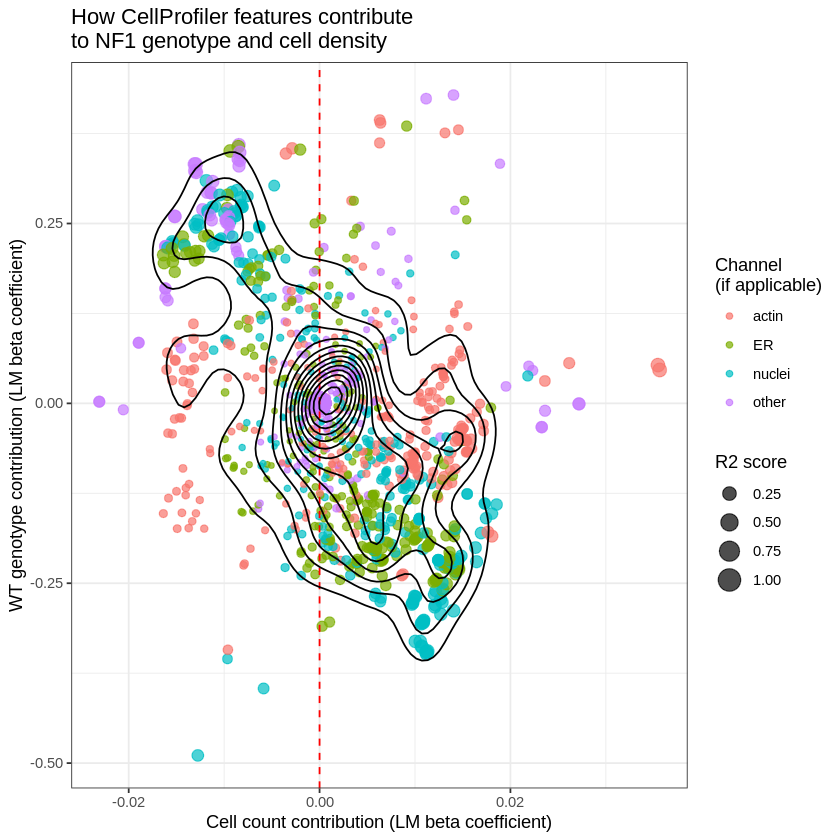

In [4]:
lm_fig_gg <- (
    ggplot(lm_df, aes(x = cell_count_coef, y = WT_coef))
    + geom_point(aes(size = r2_score, color = channel_cleaned), alpha = 0.7)
    + geom_vline(xintercept = 0, linetype = "dashed", color = "red")
    + geom_density2d(color="black", show.legend = FALSE)
    + theme_bw()
    + guides(
        color = guide_legend(title = "Channel\n(if applicable)", order = 1),
        size = guide_legend(title = "R2 score")
    )
    + ylab("WT genotype contribution (LM beta coefficient)")
    + xlab("Cell count contribution (LM beta coefficient)")
    + ggtitle("How CellProfiler features contribute\nto NF1 genotype and cell density")
)

# Output figure
ggsave(lm_fig, lm_fig_gg, dpi = 500, height = 6, width = 6)

lm_fig_gg

## Visualize DP features

In [5]:
# Load and process linear model data
lm_dp_df <- readr::read_tsv(
    lm_dp_file, col_types = readr::cols(.default = "d", feature = "c")
)

print(dim(lm_dp_df))
head(lm_dp_df, 10)

ERROR: Error: 'results/Plate2/linear_model_dp_features.tsv' does not exist in current working directory ('/home/jenna/NF1_SchwannCell_data/5_analyze_data/notebooks/linear_model').


In [ ]:
lm_dp_fig_gg <- (
    ggplot(lm_dp_df, aes(x = cell_count_coef, y = WT_coef))
    + geom_density_2d_filled(alpha = 0.5, show.legend = FALSE)
    + geom_point(aes(size = r2_score), alpha = 0.3)
    + geom_vline(xintercept = 0, linetype = "dashed", color = "red")
    + theme_bw()
    + guides(
        size = guide_legend(title = "R2 score")
    )
    + ylab("WT genotype contribution (LM beta coefficient)")
    + xlab("Cell count contribution (LM beta coefficient)")
    + ggtitle("How DeepProfiler features contribute\nto NF1 genotype and cell density")
)

# Output figure
ggsave(lm_dp_fig, lm_dp_fig_gg, dpi = 500, height = 6, width = 6)

lm_dp_fig_gg